In [16]:
import numpy as np
from matplotlib import pyplot as plt
# from Tools import estimated_time
from time import time,sleep

def estimated_time(i, n, time):
    if i == 0:
        return "ETA: inf"
    if i == n:
        return "ETA: 0"
    eta = (n - i) / i * time
    eta_h = int(eta / 3600)
    eta_m = int(eta / 60) - eta_h * 60
    eta_s = eta - eta_h * 3600 - eta_m * 60
    return "ETA: {} h {} m {:.3f} s".format(eta_h, eta_m, eta_s)

In [17]:
t0 = time()
n=5
for i in range(n):
    print("t1",estimated_time(i, n, time()-t0))
    sleep(2)
    print("t2",estimated_time(i + 1, n, time()-t0))

t1 ETA: inf
t2 ETA: 0 h 0 m 8.005 s
t1 ETA: 0 h 0 m 8.006 s
t2 ETA: 0 h 0 m 6.005 s
t1 ETA: 0 h 0 m 6.006 s
t2 ETA: 0 h 0 m 4.003 s
t1 ETA: 0 h 0 m 4.004 s
t2 ETA: 0 h 0 m 2.002 s
t1 ETA: 0 h 0 m 2.002 s
t2 ETA: 0


In [ ]:

J1dts = np.array(
    [0.5615625, 13.9453125, 3.5, 27, 4.485, 35.76, 8.97, 2.24625, 7.5747, 4.9325, 6.159594, 5.523388,
     11.48928,  17.94, 60.446,0.060719625, 278.9, 481.14,5.835716858,5.996199,6.093885]) * 1e-7
tqs = np.array([5, 1, 2, 2, 5, 5, 10, 20, 20, 20, 20, 20, 25, 20, 20, 20, 20, 20,20,20,20])
dts = np.array([0.025, 0.025, 0.025, 0.05, 0.05, 0.1, 0.1, 0.1, 0.15, 0.13, 0.14, 0.135, 0.2, 0.2, 0.3, 0.03, 0.5, 0.6,0.1375,0.13875,0.1395])
J1s = J1dts / dts
x1 = 1/tqs
x2 = dts
x = x2*x1
ys = J1s

x

In [487]:
tqs**(2/3)*0.02/dts

array([2.33921419, 0.8       , 1.26992084, 0.63496042, 1.1696071 ,
       0.58480355, 0.92831777, 1.4736126 , 0.9824084 , 1.13354815,
       1.05258043, 1.09156489, 0.85498797, 0.7368063 , 0.4912042 ,
       4.912042  , 0.29472252, 0.2456021 , 1.07171825, 1.06206313,
       1.05635312])

In [425]:
def shuffle(eps = 1):
    return bestparams + eps * np.random.randn(5)

def eval():
    return params[0] + params[1] * x+params[2]*x*x+params[3]*x*x*x+params[4]*x*x*x*x

params = np.random.randn(5)*10000
errs = (ys - eval())
error = errs @ errs
bestparams,besterror = params,error

In [470]:
print(str(error),"\t",str(besterror))
for i in range(2000000):
    params = shuffle(0.0000001)
    # params = np.random.randn(5)*0.1
    # params[0]=0
    # params[1]=0
    errs = ys - eval()
    error = errs @ errs
    if error < besterror:
        besterror = error
        bestparams = params
print(str(error),"\t",str(besterror))

9.970776851156646e-10 	 9.94264033084286e-10
8.940644794683608e-10 	 8.935865339094792e-10


In [471]:
bestparams

array([-1.30149501e-05,  2.72099650e-03,  1.29673953e-03, -1.22309539e-01,
       -9.10736153e-02])

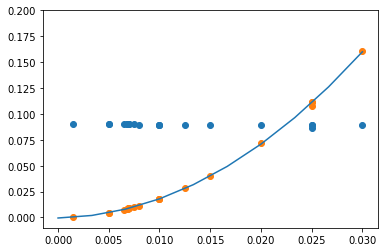

In [483]:
plt.ylim(-0.01,0.2)
plt.scatter(x,ys/x/x)
plt.scatter(x,ys*2000)
plt.plot(np.linspace(0,0.03,10,True),2000*np.poly1d(np.polyfit(x,ys,3))(np.linspace(0,0.03,10,True)))
plt.show()

In [485]:
np.poly1d(np.polyfit(x,ys,3))

poly1d([ 1.59277541e-01,  8.11845887e-02,  9.64512032e-05, -2.67735063e-07])

In [374]:
def BISECT(p1, p2):
    d12 = d(p1, p2)
    p = (p1 + p2) / 2 + 0.1 * np.random.randn(2)
    dp = d(p1, p) + d(p2, p)
    error = dp - d12
    for i in range(1000):
        p_temp = p + 0.1 * np.random.randn(2)
        dp_temp = d(p1, p) + d(p2, p)
        if dp - d12 < error:
            p = p_temp
            dp = dp_temp
            error = dp - d12
        if error < 0.001:
            break
    return p


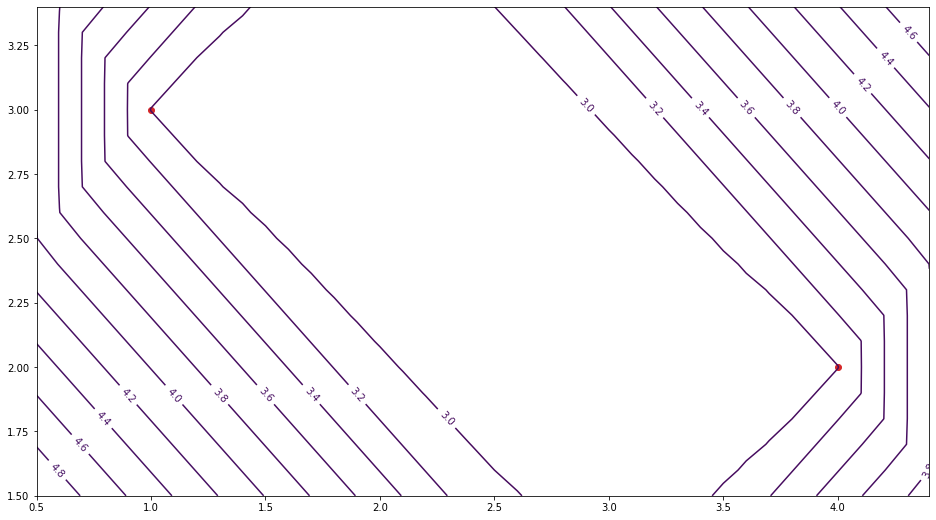

In [59]:
delta = 0.1
X, Y = np.meshgrid(np.arange(0.5, 4.5, delta), np.arange(1.5, 3.5, delta))
plt.clf()
alpha = 30
plt.plot(Ps[0], Ps[1], 'o', color='C3')


def f(_p):
    X, Y = _p
    return (np.abs(X - 1) ** (alpha) + np.abs(Y - 3) ** (alpha)) ** (1 / alpha) + (
                np.abs(X - 4) ** (alpha) + np.abs(Y - 2) ** (alpha)) ** (1 / alpha)


cs = plt.contour(X, Y, f([X, Y]), np.linspace(0, 100, 500))
plt.clabel(cs)
plt.show()

In [38]:
[f(P_UNO * i + P_DOS * (1 - i)) for i in np.linspace(0, 1, 10, endpoint=True)]

[3.1622776601683795,
 3.1622776601683795,
 3.1622776601683795,
 3.1622776601683795,
 3.162277660168379,
 3.162277660168379,
 3.162277660168379,
 3.1622776601683795,
 3.1622776601683795,
 3.1622776601683795]

In [6]:
p1 = P_UNO
p2 = P_DOS
ps = []
p_best = []
err_best = np.inf
for x in np.linspace(Ps[0].min(), Ps[0].max(), 50, endpoint=True):
    for y in np.linspace(Ps[1].min(), Ps[1].max(), 50, endpoint=True):
        p = np.array([x, y])
        if (p == P_UNO).all() or (p == P_DOS).all(): continue
        err = d(P_UNO, p) + d(p, P_DOS) - d(P_UNO, P_DOS)
        if err < err_best:
            err_best = err
            p_best = p
p = p_best

[1.06122449 2.97959184]
-4.440892098500626e-16


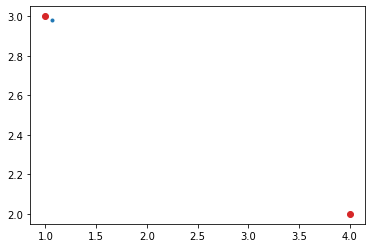

In [7]:
ps = np.array(ps)
print(p)
print(err_best)
plt.clf()
plt.plot(Ps[0], Ps[1], 'o', color='C3')
plt.plot(p[0], p[1], '.')
plt.show()

In [8]:
d(p, P_DOS) + d(p, P_UNO)

3.036588971875662

In [9]:
d(p, P_UNO)

0.06197120350766663

In [10]:
d(P_UNO, P_DOS)

3.0365889718756622